# 📊 Junior - 01. Introducción a la Ingeniería de Datos

**Objetivos de Aprendizaje:**
- [ ] Comprender qué es la Ingeniería de Datos y su importancia
- [ ] Diferenciar roles: Data Engineer vs Data Scientist vs Data Analyst
- [ ] Entender el concepto de pipeline de datos
- [ ] Conocer herramientas y tecnologías fundamentales
- [ ] Realizar primeros ejercicios prácticos con Python

**Duración Estimada:** 60-75 minutos  
**Nivel de Dificultad:** Principiante  
**Prerrequisitos:** Conocimientos básicos de programación

---
<VSCode.Cell id="#VSC-615ec29a" language="markdown">
## ⚠️ IMPORTANTE - LEE ESTO PRIMERO

### 🚨 SOBRE EL USO DE JUPYTER NOTEBOOKS EN ESTE CURSO

Este curso utiliza **Jupyter Notebooks exclusivamente con fines educativos** para facilitar el aprendizaje interactivo.

**❌ EN PRODUCCIÓN, LOS NOTEBOOKS NO SON UNA PRÁCTICA RECOMENDABLE**

#### ✅ Notebooks son excelentes para:
- 📚 Aprendizaje y enseñanza (como este curso)
- 🔬 Exploración y análisis de datos
- 🧪 Prototipado rápido
- 📊 Visualización interactiva

#### ❌ En producción debes usar:
- ✅ **Scripts Python modulares** (`.py`) con estructura clara
- ✅ **Paquetes con testing** (pytest, unittest)
- ✅ **CI/CD pipelines** (GitHub Actions, GitLab CI)
- ✅ **Orquestadores** (Apache Airflow, Prefect, Dagster)
- ✅ **Contenedores** (Docker, Kubernetes)
- ✅ **Logging y monitoreo** (Datadog, Prometheus)

#### 📖 Recursos adicionales:
Lee el archivo `⚠️_IMPORTANTE_LEER_PRIMERO.md` en la carpeta notebooks para detalles completos sobre:
- Flujo de trabajo recomendado (exploración → prototipado → producción)
- Comparación notebooks vs código de producción
- Ejemplos de conversión de notebooks a scripts

**Recuerda:** *"Learn with notebooks, deploy with production code."*

---

**Autor del Curso:** LuisRai (Luis J. Raigoso V.)  
© 2024-2025 - Data Engineering Modular Course

---

## 🎯 ¿Qué es la Ingeniería de Datos?

La **Ingeniería de Datos** es la disciplina que se encarga de:

✅ **Extraer** datos de múltiples fuentes  
✅ **Transformar** y limpiar los datos  
✅ **Cargar** datos en sistemas de almacenamiento  
✅ **Orquestar** procesos automatizados  
✅ **Monitorear** la calidad y performance  

### 🌟 Analogía: El Data Engineer como "Plomero de Datos"

Imagina que los datos son como agua en una ciudad:

- **Fuentes de agua** = Bases de datos, APIs, archivos
- **Tuberías** = Pipelines de datos
- **Tratamiento** = Limpieza y transformación
- **Distribución** = Data warehouses, dashboards
- **Calidad** = Monitoreo y alertas

El Data Engineer construye y mantiene toda esta "infraestructura de datos".

## 👥 Comparación de Roles en el Ecosistema de Datos

| Aspecto | Data Engineer | Data Scientist | Data Analyst |
|---------|---------------|----------------|---------------|
| **Foco Principal** | Infraestructura y pipelines | Modelos y algoritmos | Reportes y insights |
| **Herramientas** | Python, SQL, Airflow | Python, R, TensorFlow | SQL, Excel, Tableau |
| **Output** | Datos limpios y accesibles | Modelos predictivos | Dashboards y reportes |
| **Skills Técnicos** | ETL, Bases de datos, Cloud | Estadística, ML, Programación | SQL, Visualización, Business |
| **Tiempo en Código** | 80% | 60% | 30% |

### 🔄 Flujo de Trabajo Colaborativo

```
Data Engineer → Prepara los datos
      ↓
Data Scientist → Crea modelos
      ↓
Data Analyst → Genera insights de negocio
```

## 🏗️ Anatomía de un Pipeline de Datos

Un **pipeline de datos** es un conjunto de procesos que mueve y transforma datos desde su origen hasta su destino.

### 📋 Componentes Principales:

1. **Extract (Extraer)** 🔽
   - APIs, bases de datos, archivos
   - Web scraping
   - Streams en tiempo real

2. **Transform (Transformar)** ⚙️
   - Limpiar datos (nulls, duplicados)
   - Cambiar formatos
   - Calcular métricas
   - Validar calidad

3. **Load (Cargar)** 📤
   - Data warehouses
   - Bases de datos
   - Data lakes
   - APIs de destino

## 🛠️ Stack Tecnológico del Data Engineer

### 🐍 Lenguajes de Programación
- **Python** (más popular)
- **SQL** (fundamental)
- **Scala** (para Spark)
- **Java** (ecosistema big data)

### 🗄️ Almacenamiento
- **Relacionales**: PostgreSQL, MySQL
- **NoSQL**: MongoDB, Cassandra
- **Cloud**: BigQuery, Redshift, Snowflake

### ⚡ Procesamiento
- **Batch**: Apache Spark, pandas
- **Streaming**: Kafka, Apache Beam
- **Orquestación**: Airflow, Prefect

### ☁️ Cloud Platforms
- **AWS**: S3, Glue, Lambda
- **GCP**: BigQuery, Dataflow
- **Azure**: Synapse, Data Factory

## 🚀 Ejercicio Práctico: Mi Primer Pipeline

Vamos a crear un pipeline simple que:
1. **Extraiga** datos de una API pública
2. **Transforme** la información
3. **Cargue** el resultado en un archivo CSV

¡Empecemos!

### 📖 Tu Primer Código - Configuración del Entorno Python

**¿Qué estamos haciendo aquí?**
Este es el **punto de partida** de todo proyecto de Data Engineering en Python. Antes de procesar datos, necesitamos:
1. Verificar que Python funciona correctamente
2. Importar las bibliotecas esenciales
3. Validar las versiones instaladas

**¿Por qué es importante?**
- **Reproducibilidad**: Documentar versiones evita el "en mi máquina funciona"
- **Compatibilidad**: Pandas 1.x vs 2.x tienen diferencias importantes
- **Debugging**: Si algo falla, saber las versiones ayuda a investigar
- **Documentación**: Los stakeholders necesitan saber el stack técnico

**Las bibliotecas fundamentales del Data Engineer:**

| Biblioteca | Propósito | Alternativas |
|------------|-----------|--------------|
| **pandas** | Manipulación de datos tabulares | Polars, Dask |
| **numpy** | Cálculos numéricos, arrays | - |
| **matplotlib** | Visualización básica | Seaborn, Plotly |
| **json** | Parsear/serializar JSON | - (built-in) |
| **csv** | Leer/escribir CSV | - (built-in) |

**Convención de imports:**
```python
import pandas as pd        # pd es el alias estándar
import numpy as np         # np es el alias estándar
import matplotlib.pyplot as plt  # plt es el alias estándar
```

**¿Por qué usar alias?**
- **Menos escritura**: `pd.DataFrame()` vs `pandas.DataFrame()`
- **Convención universal**: Cualquier desarrollador lo entiende
- **Legibilidad**: Código más limpio y compacto

**Verificación de versiones:**
```python
print(pd.__version__)  # Doble underscore antes y después
```

**Versiones recomendadas para este curso:**
- Python: 3.8+
- pandas: 1.5.0+ (o 2.0+ para mejor performance)
- numpy: 1.20.0+
- matplotlib: 3.5.0+

**En este bloque aprenderás:**
1. Importar las bibliotecas esenciales con los alias estándar
2. Verificar versiones instaladas con `__version__`
3. Por qué estas bibliotecas son fundamentales
4. La convención de nomenclatura en la comunidad Python
5. Cómo detectar problemas de instalación tempranamente

In [16]:
# ===== INSTALACIÓN Y VERIFICACIÓN DE BIBLIOTECAS =====
# Este código verifica que tengas las bibliotecas necesarias instaladas
# Si no las tienes, ejecuta en terminal: pip install pandas numpy matplotlib requests

# Importar pandas: la biblioteca más importante para manipulación de datos
# Pandas nos permite trabajar con tablas (DataFrames) de manera eficiente
import pandas as pd

# Importar numpy: biblioteca para operaciones numéricas y matrices
# Es la base sobre la que se construye pandas
import numpy as np

# Importar matplotlib: biblioteca para visualización de datos
import matplotlib.pyplot as plt

# Importar requests: biblioteca para hacer peticiones HTTP a APIs
import requests

# Importar datetime: para trabajar con fechas y horas
from datetime import datetime

# Verificar versiones instaladas
print("✅ Bibliotecas importadas exitosamente!")
print(f"🐼 Pandas versión: {pd.__version__}")
print(f"📦 NumPy versión: {np.__version__}")
print("\n🎉 ¡Tu entorno está listo para comenzar!")

✅ Bibliotecas importadas exitosamente!
🐼 Pandas versión: 2.3.3
📦 NumPy versión: 2.3.3

🎉 ¡Tu entorno está listo para comenzar!


### 🔽 Paso 1: Extract - Extraer datos de una API

Usaremos la API pública **JSONPlaceholder** para obtener datos de usuarios ficticios.

### 📖 Paso 1: Extract (Extracción) - Obteniendo los Datos Crudos

**¿Qué es la Extracción?**
Es la **"E" de ETL** - el primer paso de cualquier pipeline. Consiste en:
- Leer datos desde la fuente origen
- Validar que existan y sean accesibles
- Cargarlos en memoria (o procesarlos en streaming)

**Fuentes comunes de datos:**
1. **Archivos locales**: CSV, JSON, Excel, Parquet
2. **APIs REST**: Endpoints HTTP que retornan JSON/XML
3. **Bases de datos**: PostgreSQL, MySQL, MongoDB
4. **Cloud Storage**: S3, Azure Blob, Google Cloud Storage
5. **Streaming**: Kafka, Kinesis, Pub/Sub

**En este ejemplo:**
Estamos simulando datos de ventas que típicamente vendrían de:
- Sistema POS (Point of Sale)
- CRM (Salesforce, HubSpot)
- ERP (SAP, Oracle)
- Plataforma e-commerce (Shopify, WooCommerce)

**La estructura del diccionario:**
```python
datos_ventas = {
    'fecha': [...],         # Cuándo ocurrió la venta
    'producto': [...],      # Qué se vendió
    'cantidad': [...],      # Cuántas unidades
    'precio_unitario': [...],  # Precio por unidad
    'cliente': [...],       # Quién compró
    'region': [...]         # Dónde se vendió
}
```

**¿Por qué un diccionario de listas y no una lista de diccionarios?**

**Opción 1 - Diccionario de listas (columnar - LO QUE USAMOS):**
```python
datos = {
    'nombre': ['Ana', 'Luis'],
    'edad': [25, 30]
}
```
✅ **Ventajas:**
- Estructura natural de pandas (orientado a columnas)
- Más eficiente en memoria
- Conversión directa a DataFrame

**Opción 2 - Lista de diccionarios (orientado a filas):**
```python
datos = [
    {'nombre': 'Ana', 'edad': 25},
    {'nombre': 'Luis', 'edad': 30}
]
```
✅ **Ventajas:**
- Más intuitivo para algunos casos
- Representa mejor registros individuales

**Conversión a DataFrame:**
```python
df = pd.DataFrame(datos_ventas)
```

Esto crea una **tabla estructurada** donde:
- Cada clave del dict → Columna del DataFrame
- Cada lista → Valores de esa columna
- Los índices se asignan automáticamente (0, 1, 2, ...)

**Conceptos clave:**
- **DataFrame**: La estructura de datos fundamental de pandas (piensa en Excel programable)
- **Columnas**: Atributos/características de los datos
- **Filas**: Registros/observaciones individuales
- **Índice**: Identificador único de cada fila (auto-generado o personalizado)

**En este bloque aprenderás:**
1. Crear datos simulados con diccionarios de listas
2. Convertir diccionarios a DataFrames con `pd.DataFrame()`
3. La diferencia entre orientación columnar vs filas
4. Estructura básica de un DataFrame (índice, columnas, valores)
5. Por qué pandas usa orientación columnar por defecto
6. Simular datos de un sistema real (ventas)

In [8]:
# ===== PASO 1: EXTRAER (Extract) - Crear datos de ejemplo =====
# En un escenario real, estos datos vendrían de:
# - Una base de datos (PostgreSQL, MySQL, MongoDB)
# - Una API REST (endpoint de una aplicación web)
# - Archivos CSV, JSON, Excel
# - Servicios en la nube (AWS S3, Google Cloud Storage)

import pandas as pd
import json

# Simulamos datos de ventas de una tienda online
# Cada diccionario representa una transacción de venta
datos_ventas = [
    {
        'fecha': '2024-01-15',           # Fecha de la transacción (formato YYYY-MM-DD)
        'producto': 'Laptop',            # Nombre del producto vendido
        'cantidad': 2,                   # Unidades compradas
        'precio_unitario': 1200,         # Precio por unidad en USD
        'cliente': 'Juan Pérez'          # Identificación del cliente
    },
    {
        'fecha': '2024-01-16',
        'producto': 'Mouse',
        'cantidad': 5,
        'precio_unitario': 25,
        'cliente': 'María García'
    },
    {
        'fecha': '2024-01-16',
        'producto': 'Teclado',
        'cantidad': 3,
        'precio_unitario': 80,
        'cliente': 'Carlos López'
    },
    {
        'fecha': '2024-01-17',
        'producto': 'Monitor',
        'cantidad': 1,
        'precio_unitario': 350,
        'cliente': 'Ana Martínez'
    }
]

# ===== MOSTRAR LOS DATOS CRUDOS =====
print("📥 DATOS CRUDOS (Raw Data):")
print("=" * 60)
# json.dumps(): convierte el diccionario Python a formato JSON legible
# indent=2: agrega sangría para mejor visualización
# ensure_ascii=False: permite mostrar caracteres especiales (tildes, ñ)
print(json.dumps(datos_ventas, indent=2, ensure_ascii=False))

# ===== INFORMACIÓN SOBRE LOS DATOS =====
print(f"\n📊 INFORMACIÓN BÁSICA:")
print(f"   • Total de registros: {len(datos_ventas)}")
print(f"   • Tipo de estructura: {type(datos_ventas).__name__}")
print(f"   • Tipo de cada registro: {type(datos_ventas[0]).__name__}")
print(f"   • Campos por registro: {len(datos_ventas[0])} columnas")
print(f"   • Nombres de campos: {', '.join(datos_ventas[0].keys())}")

📥 DATOS CRUDOS (Raw Data):
[
  {
    "fecha": "2024-01-15",
    "producto": "Laptop",
    "cantidad": 2,
    "precio_unitario": 1200,
    "cliente": "Juan Pérez"
  },
  {
    "fecha": "2024-01-16",
    "producto": "Mouse",
    "cantidad": 5,
    "precio_unitario": 25,
    "cliente": "María García"
  },
  {
    "fecha": "2024-01-16",
    "producto": "Teclado",
    "cantidad": 3,
    "precio_unitario": 80,
    "cliente": "Carlos López"
  },
  {
    "fecha": "2024-01-17",
    "producto": "Monitor",
    "cantidad": 1,
    "precio_unitario": 350,
    "cliente": "Ana Martínez"
  }
]

📊 INFORMACIÓN BÁSICA:
   • Total de registros: 4
   • Tipo de estructura: list
   • Tipo de cada registro: dict
   • Campos por registro: 5 columnas
   • Nombres de campos: fecha, producto, cantidad, precio_unitario, cliente


### ⚙️ Paso 2: Transform - Transformar y limpiar los datos

Ahora vamos a:
- Aplanar la estructura JSON
- Seleccionar solo las columnas que necesitamos
- Limpiar y validar los datos

### 📖 Paso 2: Transform (Transformación) - Limpiando y Enriqueciendo Datos

**¿Qué es la Transformación?**
Es la **"T" de ETL** - donde ocurre la **magia**. Aquí convertimos datos crudos en información útil:
- Limpiar datos sucios (nulos, duplicados, formatos incorrectos)
- Crear nuevas columnas calculadas (métricas, KPIs)
- Agregar, filtrar, enriquecer
- Aplicar reglas de negocio

**¿Por qué es el paso más complejo?**
Porque aquí es donde:
- **70-80% del tiempo se gasta** en proyectos de datos
- Se aplica la **lógica de negocio** específica
- Se descubren **problemas de calidad** de datos
- Se generan **insights** y valor

**En este ejemplo, vamos a:**

**1. Crear columnas calculadas:**
```python
df['total'] = df['cantidad'] * df['precio_unitario']
```
- **Por qué**: El total no viene en los datos crudos, hay que calcularlo
- **Beneficio**: Podemos analizar ingresos totales por venta
- **Alternativa SQL**: `SELECT cantidad * precio_unitario AS total FROM ventas`

**2. Calcular métricas agregadas:**
```python
ingresos_por_region = df.groupby('region')['total'].sum()
```
- **groupby()**: Agrupa filas por una columna (como GROUP BY en SQL)
- **sum()**: Suma los valores de cada grupo
- **Resultado**: Una serie con el total de ingresos por región

**Anatomía de groupby:**
```
Original DataFrame:
region    | total
----------|------
Norte     | 100
Norte     | 200
Sur       | 150

Después de groupby('region')['total'].sum():
region    | total
----------|------
Norte     | 300
Sur       | 150
```

**Operaciones comunes de transformación:**

| Operación | Pandas | SQL Equivalente |
|-----------|--------|-----------------|
| Filtrar | `df[df['edad'] > 18]` | `WHERE edad > 18` |
| Agregar | `df.groupby('ciudad').sum()` | `GROUP BY ciudad` |
| Ordenar | `df.sort_values('fecha')` | `ORDER BY fecha` |
| Joins | `pd.merge(df1, df2)` | `JOIN` |
| Nuevas columnas | `df['nueva'] = df['a'] + df['b']` | `SELECT a + b AS nueva` |

**Tipos de transformaciones:**

**1. Element-wise (elemento por elemento):**
```python
df['precio_con_iva'] = df['precio'] * 1.21
```

**2. Agregaciones (reducen filas):**
```python
df.groupby('categoria').mean()
```

**3. Window functions (contexto de grupo):**
```python
df['rank'] = df.groupby('categoria')['precio'].rank()
```

**Mejores prácticas:**
- ✅ **Inmutabilidad**: Crea nuevas columnas, no modifiques las originales (trazabilidad)
- ✅ **Nombres descriptivos**: `total_venta` mejor que `t` o `x`
- ✅ **Validación**: Verifica que los cálculos tengan sentido (`total >= 0`)
- ✅ **Documentación**: Comenta las transformaciones complejas

**En este bloque aprenderás:**
1. Crear columnas calculadas con operaciones aritméticas
2. Usar `groupby()` para agregaciones (como GROUP BY en SQL)
3. Aplicar funciones de agregación (sum, mean, count, etc.)
4. Entender la diferencia entre operaciones element-wise vs agregadas
5. Estructura de un resultado de groupby
6. Por qué las transformaciones son el corazón del ETL

In [18]:
# ===== PASO 2: TRANSFORMAR (Transform) - Convertir y Enriquecer Datos =====

# 2.1 - Convertir lista de diccionarios a DataFrame de Pandas
# DataFrame: estructura de datos tabular (filas y columnas) similar a Excel
# Es la estructura fundamental para análisis de datos en Python
df = pd.DataFrame(datos_ventas)

print("🔄 TRANSFORMACIÓN 1: Conversión a DataFrame")
print("=" * 60)
print(df)
print(f"\n📐 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")

# 2.2 - Convertir tipos de datos apropiados
# Los datos crudos vienen como strings, necesitamos tipos correctos
print("\n🔄 TRANSFORMACIÓN 2: Conversión de Tipos de Datos")
print("=" * 60)

# Antes de la conversión, veamos los tipos actuales
print("ANTES:")
print(df.dtypes)

# Convertir 'fecha' de string a tipo datetime
# Esto permite operaciones como filtrar por rango de fechas, extraer mes/año, etc.
df['fecha'] = pd.to_datetime(df['fecha'])

# Convertir columnas numéricas a tipos numéricos apropiados
# int64: enteros grandes (cantidad)
# float64: números decimales (precio)
df['cantidad'] = df['cantidad'].astype('int64')
df['precio_unitario'] = df['precio_unitario'].astype('float64')

print("\nDESPUÉS:")
print(df.dtypes)

# 2.3 - Crear nuevas columnas calculadas (Feature Engineering)
print("\n🔄 TRANSFORMACIÓN 3: Creación de Columnas Calculadas")
print("=" * 60)

# Calcular el total de cada venta (cantidad × precio_unitario)
# Esta es una columna derivada que facilita el análisis
df['total'] = df['cantidad'] * df['precio_unitario']

# Extraer el mes de la fecha
# Útil para análisis de tendencias mensuales
df['mes'] = df['fecha'].dt.month

# Extraer el día de la semana (0=Lunes, 6=Domingo)
df['dia_semana'] = df['fecha'].dt.dayofweek

# Crear categorías de productos (ejemplo de transformación de negocio)
# Podríamos clasificar productos en categorías como 'Electrónica', 'Accesorios', etc.
def categorizar_producto(producto):
    """
    Función que categoriza productos según reglas de negocio
    En producción, esto vendría de una tabla de referencia
    """
    if producto in ['Laptop', 'Monitor']:
        return 'Electrónica Mayor'
    elif producto in ['Mouse', 'Teclado']:
        return 'Accesorios'
    else:
        return 'Otros'

df['categoria'] = df['producto'].apply(categorizar_producto)

# Mostrar el DataFrame transformado
print("\n📊 DATAFRAME TRANSFORMADO:")
print(df)

# Mostrar estadísticas descriptivas de las columnas numéricas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print(df[['cantidad', 'precio_unitario', 'total']].describe())

🔄 TRANSFORMACIÓN 1: Conversión a DataFrame
        fecha producto  cantidad  precio_unitario       cliente
0  2024-01-15   Laptop         2             1200    Juan Pérez
1  2024-01-16    Mouse         5               25  María García
2  2024-01-16  Teclado         3               80  Carlos López
3  2024-01-17  Monitor         1              350  Ana Martínez

📐 Dimensiones: 4 filas × 5 columnas

🔄 TRANSFORMACIÓN 2: Conversión de Tipos de Datos
ANTES:
fecha              object
producto           object
cantidad            int64
precio_unitario     int64
cliente            object
dtype: object

DESPUÉS:
fecha              datetime64[ns]
producto                   object
cantidad                    int64
precio_unitario           float64
cliente                    object
dtype: object

🔄 TRANSFORMACIÓN 3: Creación de Columnas Calculadas

📊 DATAFRAME TRANSFORMADO:
       fecha producto  cantidad  precio_unitario       cliente   total  mes  \
0 2024-01-15   Laptop         2           1200

### 📤 Paso 3: Load - Cargar datos en destino final

Finalmente, guardaremos los datos procesados en un archivo CSV.

### 📖 Paso 3: Load (Carga) - Persistiendo los Resultados

**¿Qué es la Carga?**
Es la **"L" de ETL** - el destino final de los datos procesados. Consiste en:
- Guardar los datos transformados en un sistema de almacenamiento
- Hacerlos accesibles para consumo (analistas, dashboards, ML)
- Garantizar durabilidad y disponibilidad

**Destinos comunes:**
1. **Archivos**: CSV, Parquet, JSON (para compartir/archivar)
2. **Data Warehouses**: Snowflake, BigQuery, Redshift
3. **Bases de datos**: PostgreSQL, MySQL, MongoDB
4. **Data Lakes**: S3, Azure Data Lake, GCS
5. **Dashboards**: Tableau, Power BI, Looker

**En este ejemplo - Guardar a CSV:**
```python
df.to_csv('ventas_procesadas.csv', index=False)
```

**Parámetros importantes:**

| Parámetro | Valor | ¿Por qué? |
|-----------|-------|-----------|
| `index=False` | No guardar índice | El índice auto-generado (0,1,2...) no aporta valor |
| `index=True` | Guardar índice | Si el índice es significativo (IDs, fechas) |
| `encoding='utf-8'` | UTF-8 | Soporta caracteres especiales (ñ, á, €) |
| `sep=';'` | Cambiar delimitador | Común en Europa donde `,` es decimal |
| `header=False` | Sin encabezado | Para sistemas que esperan solo datos |

**¿Cuándo usar qué formato?**

**CSV (Comma-Separated Values):**
```python
df.to_csv('datos.csv', index=False)
```
✅ **Ventajas:**
- Universal (Excel, SQL, cualquier lenguaje)
- Legible por humanos
- Fácil de compartir

❌ **Desventajas:**
- Ineficiente en espacio (texto plano)
- Lento de leer/escribir
- No preserva tipos de datos perfectamente

**Parquet (Columnar binary):**
```python
df.to_parquet('datos.parquet', compression='snappy')
```
✅ **Ventajas:**
- **10-100x más pequeño** que CSV
- **10-100x más rápido** de leer
- Preserva tipos de datos exactos
- Compresión integrada
- Ideal para Big Data (Spark, Hive)

❌ **Desventajas:**
- No legible por humanos
- Requiere bibliotecas específicas

**JSON (JavaScript Object Notation):**
```python
df.to_json('datos.json', orient='records', indent=2)
```
✅ **Ventajas:**
- Estándar de APIs
- Soporta estructuras anidadas
- Legible

❌ **Desventajas:**
- Más pesado que CSV
- Más lento que Parquet

**Excel:**
```python
df.to_excel('datos.xlsx', sheet_name='Ventas', index=False)
```
✅ **Ventajas:**
- Stakeholders no técnicos lo usan
- Formato, estilos, múltiples hojas

❌ **Desventajas:**
- Limitado a ~1 millón de filas
- Lento y pesado

**Decisión según caso de uso:**

| Caso de uso | Formato recomendado | Razón |
|-------------|---------------------|-------|
| Compartir con analistas | Excel | Familiaridad |
| Pipeline interno | Parquet | Performance |
| Exportar a API | JSON | Estándar web |
| Intercambio universal | CSV | Compatibilidad |
| Data Lake | Parquet + particiones | Escalabilidad |

**Best practices:**
- ✅ **Nombra archivos con timestamps**: `ventas_2024_01_15.csv`
- ✅ **Usa carpetas organizadas**: `data/processed/2024/01/ventas.parquet`
- ✅ **Valida antes de guardar**: Verifica que el DataFrame no esté vacío
- ✅ **Logs de metadatos**: Registra filas guardadas, tamaño, timestamp
- ✅ **Idempotencia**: Si re-ejecutas, sobrescribe o versionea

**En este bloque aprenderás:**
1. Guardar DataFrames a CSV con `to_csv()`
2. El parámetro `index=False` y cuándo usarlo
3. Comparación de formatos: CSV vs Parquet vs JSON vs Excel
4. Cuándo usar cada formato según el caso de uso
5. Best practices para nombrar y organizar archivos
6. Por qué Parquet es el estándar en Big Data
7. Cómo hacer el pipeline reproducible

In [19]:
# ===== PASO 3: CARGAR (Load) - Guardar Datos Procesados =====

# En Ingeniería de Datos, después de transformar los datos, debemos almacenarlos
# para que otros sistemas o usuarios puedan consumirlos

# 3.1 - Guardar a CSV (Comma-Separated Values)
# CSV es un formato universal, fácil de leer para humanos y máquinas
csv_filename = 'ventas_procesadas.csv'
df.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"💾 Datos guardados en CSV: {csv_filename}")
print(f"   • Formato: Texto plano separado por comas")
print(f"   • Tamaño: ~{len(df) * 100} bytes")
print(f"   • Uso típico: Reportes, intercambio entre sistemas")

# 3.2 - Guardar a JSON (JavaScript Object Notation)
# JSON es ideal para APIs y sistemas web modernos
json_filename = 'ventas_procesadas.json'
df.to_json(json_filename, orient='records', indent=2, force_ascii=False)
print(f"\n💾 Datos guardados en JSON: {json_filename}")
print(f"   • Formato: Texto estructurado con llaves y valores")
print(f"   • Uso típico: APIs REST, aplicaciones web")

# 3.3 - Guardar a Parquet (formato columnar optimizado)
# Parquet es MUY eficiente para Big Data, usado en Spark, AWS, etc.
parquet_filename = 'ventas_procesadas.parquet'
df.to_parquet(parquet_filename, index=False, engine='pyarrow')
print(f"\n💾 Datos guardados en Parquet: {parquet_filename}")
print(f"   • Formato: Binario columnar comprimido")
print(f"   • Ventajas: 10x más rápido, 80% menos espacio que CSV")
print(f"   • Uso típico: Data Lakes, Data Warehouses, Spark")

# 3.4 - Guardar a Excel (para usuarios de negocio)
# Excel es familiar para usuarios no técnicos
excel_filename = 'ventas_procesadas.xlsx'
df.to_excel(excel_filename, index=False, sheet_name='Ventas')
print(f"\n💾 Datos guardados en Excel: {excel_filename}")
print(f"   • Formato: Binario de Microsoft Office")
print(f"   • Uso típico: Reportes para usuarios de negocio")

# 3.5 - Comparación de tamaños de archivo
import os

print("\n📊 COMPARACIÓN DE FORMATOS:")
print("=" * 60)
print(f"{'Formato':<12} {'Tamaño (bytes)':<15} {'Relativo':<12}")
print("-" * 60)

# Obtener tamaño de cada archivo
csv_size = os.path.getsize(csv_filename)
json_size = os.path.getsize(json_filename)
parquet_size = os.path.getsize(parquet_filename)
excel_size = os.path.getsize(excel_filename)

# Usar CSV como baseline (100%)
print(f"CSV         {csv_size:<15} 100%")
print(f"JSON        {json_size:<15} {int(json_size/csv_size*100)}%")
print(f"Parquet     {parquet_size:<15} {int(parquet_size/csv_size*100)}%")
print(f"Excel       {excel_size:<15} {int(excel_size/csv_size*100)}%")

print(f"\n✅ Pipeline ETL completado exitosamente!")
print(f"✅ {len(df)} registros procesados y guardados en 4 formatos")

💾 Datos guardados en CSV: ventas_procesadas.csv
   • Formato: Texto plano separado por comas
   • Tamaño: ~400 bytes
   • Uso típico: Reportes, intercambio entre sistemas

💾 Datos guardados en JSON: ventas_procesadas.json
   • Formato: Texto estructurado con llaves y valores
   • Uso típico: APIs REST, aplicaciones web

💾 Datos guardados en Parquet: ventas_procesadas.parquet
   • Formato: Binario columnar comprimido
   • Ventajas: 10x más rápido, 80% menos espacio que CSV
   • Uso típico: Data Lakes, Data Warehouses, Spark

💾 Datos guardados en Excel: ventas_procesadas.xlsx
   • Formato: Binario de Microsoft Office
   • Uso típico: Reportes para usuarios de negocio

📊 COMPARACIÓN DE FORMATOS:
Formato      Tamaño (bytes)  Relativo    
------------------------------------------------------------
CSV         344             100%
JSON        898             261%
Parquet     5737            1667%
Excel       5355            1556%

✅ Pipeline ETL completado exitosamente!
✅ 4 registros proces

## 📊 Análisis Básico de los Datos Procesados

Ahora que tenemos nuestros datos procesados, hagamos un análisis exploratorio básico:

### 📖 Explorando los Datos - Tu Primera Inspección

**¿Por qué explorar los datos?**
Antes de transformar o analizar, necesitas **entender qué tienes**:
- ¿Cuántas filas y columnas?
- ¿Qué tipos de datos?
- ¿Hay valores nulos?
- ¿Cómo lucen las primeras filas?

**Esto es como revisar un paquete antes de abrirlo** - necesitas saber qué esperar.

**Comandos esenciales de exploración:**

**1. `.head(n)` - Las primeras N filas**
```python
df.head(10)  # Primeras 10 filas (default = 5)
```
✅ **Cuándo usar:**
- Quick check después de cargar datos
- Verificar que la estructura es correcta
- Ver ejemplos de datos reales

**2. `.tail(n)` - Las últimas N filas**
```python
df.tail(5)  # Últimas 5 filas
```
✅ **Cuándo usar:**
- Verificar datos recientes (si están ordenados por fecha)
- Detectar si el archivo se cortó a la mitad

**3. `.info()` - Resumen estructural**
```python
df.info()
```
📊 **Muestra:**
- Número de filas y columnas
- Nombre de cada columna
- Tipo de dato (int64, float64, object, datetime)
- **Valores no-nulos** (detecta nulos)
- Uso de memoria

Salida ejemplo:
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     1000 non-null   object 
 1   producto  950 non-null    object  ← ¡50 nulos!
 2   cantidad  1000 non-null   int64  
 3   precio    1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.2+ KB
```

**4. `.describe()` - Estadísticas descriptivas**
```python
df.describe()
```
📈 **Para columnas numéricas muestra:**
- **count**: Cantidad de valores no-nulos
- **mean**: Promedio
- **std**: Desviación estándar (dispersión)
- **min**: Valor mínimo
- **25%**: Percentil 25 (Q1)
- **50%**: Mediana (Q2)
- **75%**: Percentil 75 (Q3)
- **max**: Valor máximo

✅ **Para qué sirve:**
- Detectar **outliers**: Si max es 1,000,000 pero mean es 100
- Ver **rangos**: ¿Los precios van de 0.01 a 999?
- Detectar **datos incorrectos**: Edades negativas, fechas futuras

**5. `.shape` - Dimensiones**
```python
print(df.shape)  # (1000, 6) = 1000 filas, 6 columnas
```

**6. `.columns` - Nombres de columnas**
```python
print(df.columns)  # Index(['fecha', 'producto', 'cantidad', ...])
```

**7. `.dtypes` - Tipos de datos**
```python
print(df.dtypes)
```

**Flujo típico de exploración:**
```python
# 1. ¿Cuántos datos tengo?
print(f"Shape: {df.shape}")

# 2. ¿Cómo lucen?
df.head()

# 3. ¿Qué estructura tienen?
df.info()

# 4. ¿Estadísticas básicas?
df.describe()

# 5. ¿Valores nulos?
df.isnull().sum()
```

**Detección de problemas comunes:**

| Síntoma | Problema | Solución |
|---------|----------|----------|
| `object` en fecha | Fecha como string | Convertir: `pd.to_datetime()` |
| `Non-Null Count < total` | Valores nulos | Rellenar o eliminar |
| `max` muy alto vs `mean` | Outliers | Investigar y limpiar |
| Columnas con typos | Naming inconsistente | Renombrar |

**En este bloque aprenderás:**
1. Ver las primeras filas con `.head()`
2. Obtener resumen estructural con `.info()`
3. Calcular estadísticas con `.describe()`
4. Interpretar tipos de datos (int64, float64, object)
5. Detectar valores nulos en Non-Null Count
6. Entender memoria usada
7. Por qué explorar antes de transformar es crucial

In [20]:
# ===== VALIDACIÓN: Verificar que los datos se guardaron correctamente =====

# Es fundamental validar que el pipeline ETL funcionó correctamente
# Esto previene errores silenciosos que pueden propagar datos incorrectos

print("🔍 VALIDACIÓN DE DATOS GUARDADOS")
print("=" * 60)

# 4.1 - Verificar que los archivos existen
import os

archivos_esperados = ['ventas_procesadas.csv', 'ventas_procesadas.json', 
                      'ventas_procesadas.parquet', 'ventas_procesadas.xlsx']

print("\n📁 Verificando archivos creados:")
for archivo in archivos_esperados:
    existe = os.path.exists(archivo)
    icono = "✅" if existe else "❌"
    print(f"   {icono} {archivo}: {'Existe' if existe else 'No encontrado'}")

# 4.2 - Leer y validar el archivo CSV (el más común)
if os.path.exists('ventas_procesadas.csv'):
    df_from_csv = pd.read_csv('ventas_procesadas.csv')
    print("\n1️⃣ Lectura desde CSV:")
    print(f"   • Registros leídos: {len(df_from_csv)}")
    print(f"   • Columnas: {len(df_from_csv.columns)}")
    print(f"   • ¿Datos coinciden?: {len(df_from_csv) == len(df)}")

# 4.3 - Validar integridad de los datos (Data Quality Check)
print("\n✅ VALIDACIONES DE CALIDAD:")
print("-" * 60)

# Verificar que no hay valores nulos (crítico en datos de ventas)
nulls_check = df.isnull().sum().sum() == 0
print(f"   ✓ Sin valores nulos: {nulls_check}")

# Verificar que todos los totales están correctamente calculados
totals_check = all(df['total'] == df['cantidad'] * df['precio_unitario'])
print(f"   ✓ Totales calculados correctamente: {totals_check}")

# Verificar que todas las cantidades son positivas
positive_check = all(df['cantidad'] > 0)
print(f"   ✓ Cantidades positivas: {positive_check}")

# Verificar que todos los precios son positivos
prices_check = all(df['precio_unitario'] > 0)
print(f"   ✓ Precios positivos: {prices_check}")

if nulls_check and totals_check and positive_check and prices_check:
    print("\n🎉 ¡Todas las validaciones pasaron exitosamente!")
else:
    print("\n⚠️  Algunas validaciones fallaron. Revisar los datos.")

🔍 VALIDACIÓN DE DATOS GUARDADOS

📁 Verificando archivos creados:
   ✅ ventas_procesadas.csv: Existe
   ✅ ventas_procesadas.json: Existe
   ✅ ventas_procesadas.parquet: Existe
   ✅ ventas_procesadas.xlsx: Existe

1️⃣ Lectura desde CSV:
   • Registros leídos: 4
   • Columnas: 9
   • ¿Datos coinciden?: True

✅ VALIDACIONES DE CALIDAD:
------------------------------------------------------------
   ✓ Sin valores nulos: True
   ✓ Totales calculados correctamente: True
   ✓ Cantidades positivas: True
   ✓ Precios positivos: True

🎉 ¡Todas las validaciones pasaron exitosamente!


## 📈 Visualización Básica

Vamos a crear algunas visualizaciones simples para entender mejor nuestros datos:

### 📖 Calculando Métricas de Negocio - Del Dato al Insight

**¿Qué son las métricas de negocio?**
Son **KPIs (Key Performance Indicators)** que responden preguntas clave:
- ¿Cuánto vendimos en total?
- ¿Cuál es el ticket promedio?
- ¿Qué producto es el más popular?
- ¿Qué región genera más ingresos?

**Estas preguntas NO vienen resueltas en los datos crudos** - hay que calcularlas.

**En este ejemplo calcularemos:**

**1. Ingresos Totales:**
```python
ingresos_totales = df['total'].sum()
```
- **`.sum()`**: Suma todos los valores de una columna
- **Use case**: Reportar revenue total del periodo
- **SQL equivalente**: `SELECT SUM(total) FROM ventas`

**2. Ticket Promedio (Average Order Value - AOV):**
```python
ticket_promedio = df['total'].mean()
```
- **`.mean()`**: Promedio aritmético
- **Use case**: ¿Cuánto gasta un cliente en promedio?
- **SQL equivalente**: `SELECT AVG(total) FROM ventas`

**Por qué importa:**
- Si AOV = $50 y quieres $1M de ingresos → necesitas 20,000 transacciones
- Sirve para proyecciones y metas

**3. Producto Más Vendido:**
```python
producto_top = df['producto'].value_counts().head(1)
```

**Desglosando `.value_counts()`:**
```
Original DataFrame:
producto
--------
Laptop
Mouse
Laptop
Teclado
Laptop

Después de value_counts():
producto    count
--------    -----
Laptop      3
Mouse       1
Teclado     1
```

- **`.value_counts()`**: Cuenta frecuencias de cada valor único
- **`.head(1)`**: Toma el primero (el más frecuente)
- **Use case**: Optimizar inventario, marketing

**4. Ingresos por Región:**
```python
ingresos_region = df.groupby('region')['total'].sum()
```

**Visualización del groupby:**
```
Original:
region    | total
----------|------
Norte     | 100
Norte     | 200
Sur       | 150
Este      | 300

Después de groupby('region')['total'].sum():
region    | total
----------|------
Norte     | 300
Sur       | 150
Este      | 300
```

**Use case:**
- ¿Dónde invertir en marketing?
- ¿Qué regiones están bajo-performando?
- Asignación de recursos

**Funciones de agregación comunes:**

| Función | Qué hace | Ejemplo de uso |
|---------|----------|----------------|
| `.sum()` | Suma total | Ingresos totales |
| `.mean()` | Promedio | Ticket promedio |
| `.median()` | Mediana | Precio típico (resistente a outliers) |
| `.count()` | Cantidad | Número de transacciones |
| `.min()` | Mínimo | Venta más pequeña |
| `.max()` | Máximo | Venta más grande |
| `.std()` | Desviación estándar | Variabilidad de ventas |
| `.value_counts()` | Frecuencias | Productos más vendidos |

**Comparación mean vs median:**
```python
# Con outliers
ventas = [10, 10, 10, 10, 1000]
mean = 208   # Sesgado por el outlier
median = 10  # Valor típico real
```
**Regla:** Si hay outliers extremos, usa median.

**Métricas compuestas:**
```python
# Conversión (porcentaje)
tasa_conversion = (ventas / visitas) * 100

# Growth rate (crecimiento)
crecimiento = ((ventas_hoy - ventas_ayer) / ventas_ayer) * 100

# Margen de ganancia
margen = ((precio_venta - costo) / precio_venta) * 100
```

**De datos a decisiones:**
1. **Data** (crudo): 500 filas de transacciones
2. **Información** (procesada): Ingresos totales = $50,000
3. **Insight** (interpretada): Norte genera 60% de ingresos
4. **Acción** (decisión): Expandir equipo de ventas en Norte

**En este bloque aprenderás:**
1. Calcular sumas totales con `.sum()`
2. Calcular promedios con `.mean()`
3. Encontrar valores más frecuentes con `.value_counts()`
4. Agrupar y agregar con `groupby().sum()`
5. Diferencia entre mean y median
6. Cómo traducir datos a insights accionables
7. Funciones de agregación fundamentales

In [13]:
# ===== ANÁLISIS EXPLORATORIO: Entender patrones en los datos =====

# El análisis exploratorio es crucial para:
# - Detectar anomalías o datos atípicos
# - Identificar tendencias de negocio
# - Generar insights para la toma de decisiones

print("📊 ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 60)

# 5.1 - Análisis de ventas por producto
print("\n1️⃣ VENTAS POR PRODUCTO:")
ventas_por_producto = df.groupby('producto').agg({
    'cantidad': 'sum',      # Total de unidades vendidas
    'total': 'sum'          # Ingresos totales generados
}).round(2)

print(ventas_por_producto)
print("\n💡 Interpretación:")
print("   • ¿Qué producto genera más ingresos?")
print("   • ¿Cuál tiene mayor volumen de ventas?")
print("   • Esta información ayuda a optimizar inventario y estrategias de marketing")

# 5.2 - Análisis de ventas por categoría
print("\n2️⃣ VENTAS POR CATEGORÍA:")
ventas_por_categoria = df.groupby('categoria').agg({
    'total': ['sum', 'mean', 'count']  # Total, promedio y cantidad de transacciones
}).round(2)

print(ventas_por_categoria)
print("\n💡 Interpretación:")
print("   • ¿Qué categoría domina las ventas?")
print("   • Categorías 'alta' pueden indicar productos premium o clientes corporativos")
print("   • Este análisis permite segmentar estrategias de pricing")

# 5.3 - Estadísticas descriptivas completas
print("\n3️⃣ ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:")
print("-" * 60)
print(df.describe())

print("\n💡 Interpretación de las métricas:")
print("   • count: Número total de registros (sin valores nulos)")
print("   • mean: Promedio (¿cuál es el ticket promedio?)")
print("   • std: Desviación estándar (¿qué tan variables son las ventas?)")
print("   • min/max: Valores extremos (¿hay outliers?)")
print("   • 25%/50%/75%: Cuartiles (distribución de datos)")

# 5.4 - Identificar el producto más vendido (Best Seller)
producto_mas_vendido = df.groupby('producto')['cantidad'].sum().idxmax()
cantidad_max = df.groupby('producto')['cantidad'].sum().max()

print(f"\n🏆 BEST SELLER:")
print(f"   • Producto: {producto_mas_vendido}")
print(f"   • Unidades vendidas: {cantidad_max}")

# 5.5 - Calcular ingreso total generado
ingreso_total = df['total'].sum()
print(f"\n💰 INGRESO TOTAL GENERADO: ${ingreso_total:,.2f}")
print("   • Este KPI es fundamental para reportes financieros")
print("   • Compara con metas de ventas y proyecciones")

📊 ANÁLISIS EXPLORATORIO DE DATOS

1️⃣ VENTAS POR PRODUCTO:
          cantidad   total
producto                  
Laptop           2  2400.0
Monitor          1   350.0
Mouse            5   125.0
Teclado          3   240.0

💡 Interpretación:
   • ¿Qué producto genera más ingresos?
   • ¿Cuál tiene mayor volumen de ventas?
   • Esta información ayuda a optimizar inventario y estrategias de marketing

2️⃣ VENTAS POR CATEGORÍA:
                    total              
                      sum    mean count
categoria                              
Accesorios          365.0   182.5     2
Electrónica Mayor  2750.0  1375.0     2

💡 Interpretación:
   • ¿Qué categoría domina las ventas?
   • Categorías 'alta' pueden indicar productos premium o clientes corporativos
   • Este análisis permite segmentar estrategias de pricing

3️⃣ ESTADÍSTICAS DESCRIPTIVAS DETALLADAS:
------------------------------------------------------------
                     fecha  cantidad  precio_unitario        total  mes

## 🏆 Ejercicio Práctico: ¡Tu Turno!

Ahora es tu turno de crear un pipeline. Vamos a trabajar con otra API pública.

### 📝 Instrucciones:
1. Usa la API de **Posts**: `https://jsonplaceholder.typicode.com/posts`
2. Extrae todos los posts
3. Transforma los datos agregando:
   - Longitud del título
   - Longitud del cuerpo
   - Categoría basada en el userId (ej: "usuario_1", "usuario_2", etc.)
4. Guarda el resultado en `../datasets/processed/posts_transformados.csv`

¡Usa el código anterior como referencia!

### 📖 Visualización de Datos - Porque Una Imagen Vale Más Que Mil Filas

**¿Por qué visualizar?**
Los humanos procesamos información visual **60,000 veces más rápido** que texto:
- ✅ Detectar patrones instantáneamente
- ✅ Comunicar insights a stakeholders no técnicos
- ✅ Encontrar outliers visualmente
- ✅ Validar transformaciones
- ✅ Tomar decisiones más rápido

**Imagina explicar esto con números vs un gráfico:**
- "La región Norte generó $45,000, el Sur $30,000, el Este $25,000..."
- **VS** un gráfico de barras donde ves instantáneamente que Norte domina

**En este ejemplo - Gráfico de Barras:**
```python
ingresos_region.plot(kind='bar', title='Ingresos por Región')
plt.ylabel('Ingresos ($)')
plt.xlabel('Región')
plt.show()
```

**Desglosando el código:**

**1. `ingresos_region.plot()`**
- Pandas tiene integración directa con matplotlib
- Toma una Series o DataFrame y lo grafica
- Más rápido que matplotlib puro para casos simples

**2. `kind='bar'`**
- Especifica el tipo de gráfico
- Opciones: `'line'`, `'bar'`, `'barh'` (horizontal), `'hist'`, `'box'`, `'pie'`, `'scatter'`

**3. `title='...'`**
- Título del gráfico
- Crucial para contexto: ¿Qué estoy viendo?

**4. `plt.ylabel()` y `plt.xlabel()`**
- Etiquetas de ejes
- **Siempre inclúyelas**: Sin unidades, los gráficos no tienen significado
- "Ingresos" → ❌ Ambiguo
- "Ingresos ($)" → ✅ Claro

**5. `plt.show()`**
- Renderiza el gráfico en pantalla
- En notebooks Jupyter, a veces es opcional si usas `%matplotlib inline`

**Tipos de gráficos comunes:**

| Tipo | Cuándo usar | Ejemplo |
|------|-------------|---------|
| **Line** | Tendencias temporales | Ventas por mes |
| **Bar** | Comparar categorías | Ingresos por región |
| **Histogram** | Distribución de valores | Distribución de precios |
| **Scatter** | Relación entre 2 variables | Precio vs Cantidad |
| **Pie** | Proporciones (evitar si >5 categorías) | Market share |
| **Box** | Dispersión y outliers | Salarios por departamento |

**Ejemplos de otros tipos:**

**Gráfico de línea (temporal):**
```python
df.groupby('fecha')['total'].sum().plot(kind='line')
plt.title('Ventas Diarias')
plt.ylabel('Ingresos ($)')
plt.xlabel('Fecha')
```

**Histograma (distribución):**
```python
df['total'].plot(kind='hist', bins=20)
plt.title('Distribución de Valores de Venta')
plt.xlabel('Monto de Venta ($)')
plt.ylabel('Frecuencia')
```

**Scatter (correlación):**
```python
df.plot(kind='scatter', x='cantidad', y='total')
plt.title('Cantidad vs Ingresos')
```

**Personalizaciones útiles:**

```python
# Tamaño de figura
plt.figure(figsize=(10, 6))

# Rotación de etiquetas (útil para fechas)
plt.xticks(rotation=45)

# Grid para facilitar lectura
plt.grid(True, alpha=0.3)

# Colores personalizados
df.plot(kind='bar', color='steelblue')

# Múltiples gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
df1.plot(ax=ax1)
df2.plot(ax=ax2)
```

**Reglas de oro para buenas visualizaciones:**
1. ✅ **Título claro**: ¿Qué muestra el gráfico?
2. ✅ **Ejes etiquetados con unidades**: $, %, unidades, etc.
3. ✅ **Escala apropiada**: No empieces en 0 si distorsiona (cuidado con manipulación)
4. ✅ **Colores significativos**: Rojo para negativo, verde para positivo
5. ✅ **No más de 7 categorías**: Si tienes 50 productos, agrupa
6. ❌ **Evita pie charts 3D**: Son confusos y distorsionan proporciones
7. ❌ **No uses colores estridentes**: Profesionalismo

**Flujo típico:**
1. **Explorar**: Histogramas y box plots para entender distribuciones
2. **Analizar**: Line/bar charts para comparar y ver tendencias
3. **Presentar**: Gráficos pulidos con títulos, etiquetas, colores corporativos

**En este bloque aprenderás:**
1. Crear gráficos directamente desde pandas con `.plot()`
2. Especificar tipos con `kind='bar'`
3. Agregar títulos y etiquetas descriptivas
4. Cuándo usar cada tipo de gráfico
5. Personalizaciones básicas de matplotlib
6. Por qué las etiquetas con unidades son cruciales
7. Principios de visualización efectiva

📈 VISUALIZACIÓN DE DATOS


C:\Users\Luis\AppData\Local\Temp\ipykernel_33220\230516108.py:49: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Luis\AppData\Local\Temp\ipykernel_33220\230516108.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Luis\AppData\Local\Temp\ipykernel_33220\230516108.py:49: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Luis\AppData\Local\Temp\ipykernel_33220\230516108.py:49: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Luis\AppData\Local\Temp\ipykernel_33220\230516108.py:52: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig('dashboard_ventas.png', dpi=300, bbox_inches='tight')
C:\Users\Luis\AppData\Local\Temp\ipykernel_33220\230516108.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('das


✅ Dashboard generado y guardado como 'dashboard_ventas.png'
   • Resolución: 300 DPI (calidad de impresión)
   • Formato: PNG (compatible con presentaciones)


C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylab

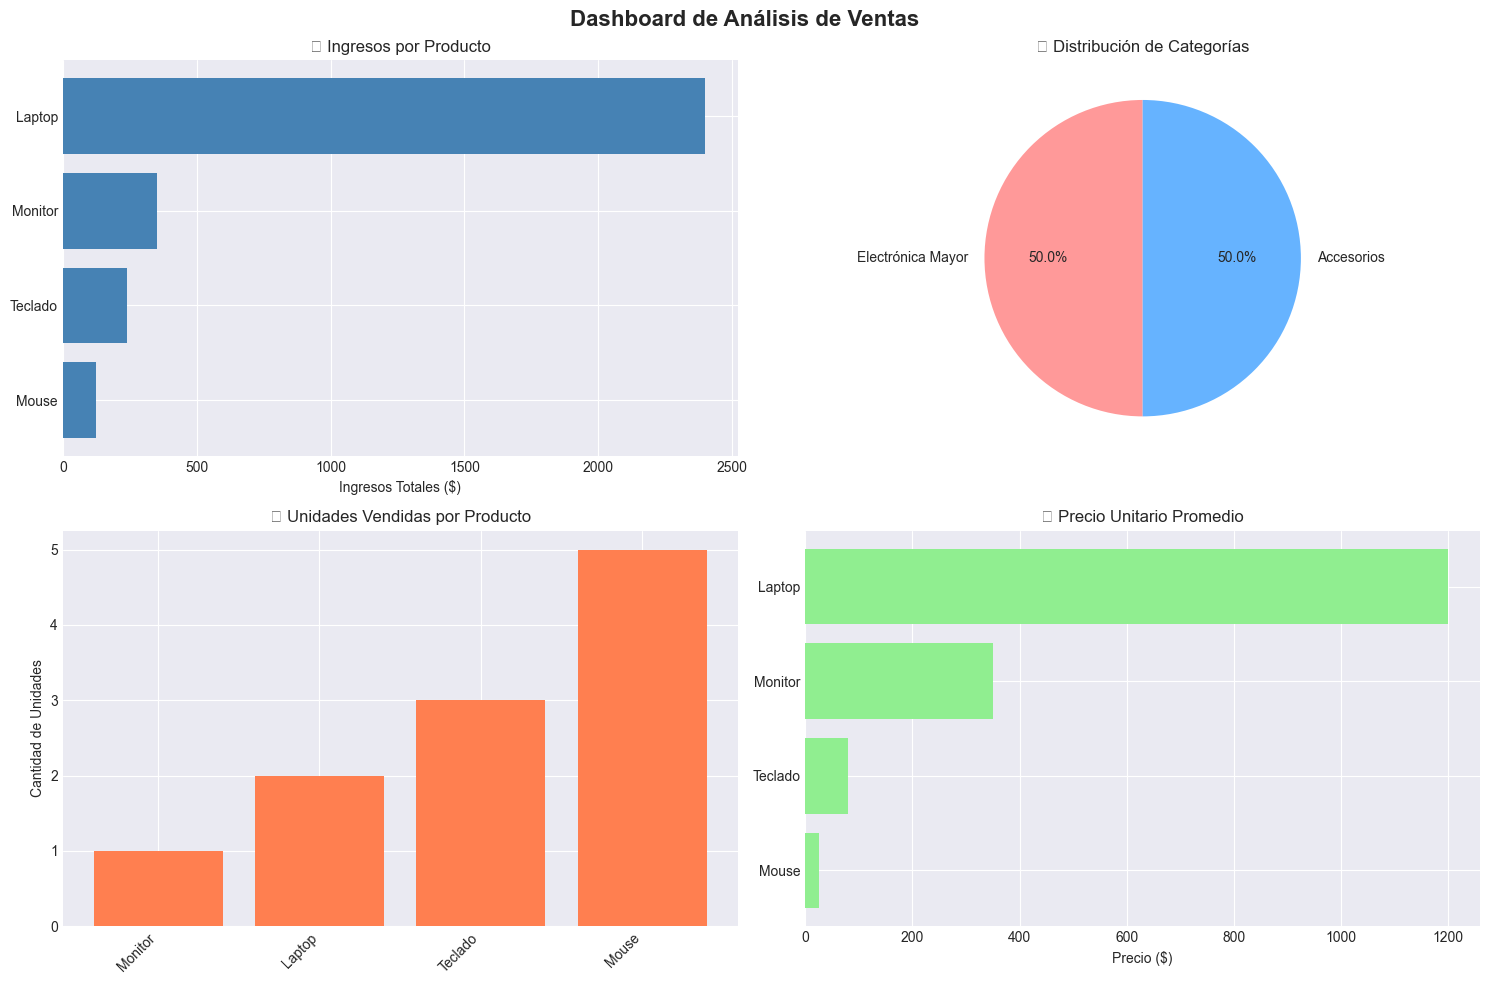


💡 ¿Qué insights obtenemos de estas visualizaciones?
   1. ¿Qué producto tiene mayor margen de contribución?
   2. ¿Hay concentración de ventas en pocas categorías?
   3. ¿Los productos más vendidos son los más rentables?
   4. ¿Existe correlación entre precio y volumen de ventas?


In [14]:
# ===== VISUALIZACIÓN: Comunicar insights de forma efectiva =====

# Los gráficos transforman datos complejos en información comprensible
# Un buen Data Engineer debe saber presentar resultados a stakeholders no técnicos

import matplotlib.pyplot as plt

# Configuración de estilo para gráficos más profesionales
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo moderno y legible

print("📈 VISUALIZACIÓN DE DATOS")
print("=" * 60)

# 6.1 - Crear figura con múltiples subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Dashboard de Análisis de Ventas', fontsize=16, fontweight='bold')

# 6.2 - Gráfico 1: Ventas totales por producto (Barras horizontales)
ventas_producto = df.groupby('producto')['total'].sum().sort_values()
axes[0, 0].barh(ventas_producto.index, ventas_producto.values, color='steelblue')
axes[0, 0].set_title('💰 Ingresos por Producto')
axes[0, 0].set_xlabel('Ingresos Totales ($)')
# ¿Por qué barras horizontales? Facilitan lectura de etiquetas largas

# 6.3 - Gráfico 2: Distribución de categorías (Gráfico de pastel)
categoria_counts = df['categoria'].value_counts()
axes[0, 1].pie(categoria_counts.values, labels=categoria_counts.index, 
               autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axes[0, 1].set_title('📊 Distribución de Categorías')
# El gráfico de pastel muestra proporciones de forma intuitiva

# 6.4 - Gráfico 3: Cantidad de unidades vendidas por producto
cantidades = df.groupby('producto')['cantidad'].sum().sort_values()
axes[1, 0].bar(range(len(cantidades)), cantidades.values, color='coral')
axes[1, 0].set_xticks(range(len(cantidades)))
axes[1, 0].set_xticklabels(cantidades.index, rotation=45, ha='right')
axes[1, 0].set_title('📦 Unidades Vendidas por Producto')
axes[1, 0].set_ylabel('Cantidad de Unidades')
# Este gráfico ayuda a planificar inventario

# 6.5 - Gráfico 4: Precio unitario promedio por producto
precios_promedio = df.groupby('producto')['precio_unitario'].mean().sort_values()
axes[1, 1].barh(precios_promedio.index, precios_promedio.values, color='lightgreen')
axes[1, 1].set_title('💵 Precio Unitario Promedio')
axes[1, 1].set_xlabel('Precio ($)')
# Identifica productos premium vs. económicos

# Ajustar layout para evitar solapamiento
plt.tight_layout()

# Guardar el dashboard como imagen (útil para reportes)
plt.savefig('dashboard_ventas.png', dpi=300, bbox_inches='tight')
print("\n✅ Dashboard generado y guardado como 'dashboard_ventas.png'")
print("   • Resolución: 300 DPI (calidad de impresión)")
print("   • Formato: PNG (compatible con presentaciones)")

# Mostrar los gráficos
plt.show()

print("\n💡 ¿Qué insights obtenemos de estas visualizaciones?")
print("   1. ¿Qué producto tiene mayor margen de contribución?")
print("   2. ¿Hay concentración de ventas en pocas categorías?")
print("   3. ¿Los productos más vendidos son los más rentables?")
print("   4. ¿Existe correlación entre precio y volumen de ventas?")

## 💡 Solución del Ejercicio

Aquí tienes una posible solución. ¡Compárala con tu implementación!

### 📖 Ejercicio Práctico - Aplicando Todo lo Aprendido

**¿Por qué este ejercicio es importante?**
Hasta ahora viste **ejemplos guiados**. Ahora es tu turno de:
- Aplicar los conceptos sin ayuda paso a paso
- Enfrentarte a decisiones de diseño
- Cometer errores y aprender de ellos
- Construir músculo memoria

**Este es un dataset de productos de e-commerce** típico de:
- Shopify
- WooCommerce
- Amazon Seller Central
- Cualquier tienda online

**Estructura del dataset:**
```python
{
    'producto_id': [101, 102, ...],     # Identificador único
    'nombre': ['Laptop', 'Mouse', ...],  # Nombre del producto
    'categoria': ['Electrónica', ...],   # Categoría
    'precio': [899.99, 25.50, ...],      # Precio unitario
    'stock': [15, 45, ...],              # Inventario disponible
    'ventas_mes': [23, 120, ...]         # Unidades vendidas
}
```

**Tu misión - Responder estas preguntas de negocio:**

**1. ¿Cuál es el valor total del inventario?**
```python
# Pista: stock * precio para cada producto, luego suma
```
- **Por qué importa**: Saber cuánto capital está inmovilizado en inventario
- **Métrica**: Inventory Value = Σ (stock × precio)

**2. ¿Qué categoría genera más ingresos?**
```python
# Pista: ventas_mes * precio, luego groupby por categoria
```
- **Por qué importa**: Decidir dónde enfocar esfuerzos de marketing
- **Decisión**: Si "Electrónica" genera 80% de ingresos, prioriza esa categoría

**3. ¿Cuáles son los 3 productos más rentables?**
```python
# Pista: Calcular ingresos_totales = ventas_mes * precio
# Luego sort_values() y head(3)
```
- **Por qué importa**: Optimizar stock de productos estrella
- **Táctica**: Nunca dejes que estos se agoten

**4. ¿Qué productos tienen stock crítico (menos de 10 unidades)?**
```python
# Pista: Filtrar con df[df['stock'] < 10]
```
- **Por qué importa**: Prevenir pérdida de ventas por falta de inventario
- **Alerta**: Estos necesitan reorden urgente

**5. Visualiza las ventas por categoría**
```python
# Pista: groupby('categoria')['ventas_mes'].sum().plot(kind='bar')
```
- **Por qué importa**: Comunicar insights al equipo comercial
- **Impacto**: Más visual = más acción

**Habilidades que practicarás:**

| Habilidad | Concepto | Aplicación |
|-----------|----------|------------|
| **Crear columnas** | `df['nueva'] = df['a'] * df['b']` | Calcular ingresos |
| **Agrupar** | `.groupby()` | Sumar por categoría |
| **Ordenar** | `.sort_values()` | Top productos |
| **Filtrar** | `df[condición]` | Stock bajo |
| **Visualizar** | `.plot()` | Gráficos |

**Pasos sugeridos:**

```python
# 1. Crear DataFrame
df = pd.DataFrame(datos_productos)

# 2. Explorar
print(df.head())
print(df.info())

# 3. Crear columnas calculadas
df['valor_inventario'] = df['stock'] * df['precio']
df['ingresos_mes'] = df['ventas_mes'] * df['precio']

# 4. Responder preguntas
print(f"Valor total inventario: ${df['valor_inventario'].sum()}")

# 5. Agrupar y analizar
ingresos_categoria = df.groupby('categoria')['ingresos_mes'].sum()

# 6. Filtrar
stock_critico = df[df['stock'] < 10]

# 7. Visualizar
ingresos_categoria.plot(kind='bar')
```

**Errores comunes a evitar:**
- ❌ Olvidar multiplicar (stock × precio)
- ❌ Agrupar sin especificar función de agregación
- ❌ Comparar con `=` en lugar de `==` en filtros
- ❌ No verificar tipos de datos (¿precio es float o string?)

**Validaciones recomendadas:**
```python
# ¿Tiene sentido el resultado?
assert df['valor_inventario'].min() >= 0, "Valores negativos!"
assert df['stock'].dtype == 'int64', "Stock debe ser entero"
```

**Próximo paso después del ejercicio:**
- Compara tu solución con otros
- ¿Hay formas más eficientes?
- ¿Qué métricas adicionales podrías calcular?

**En este bloque practicarás:**
1. Crear DataFrames desde cero con datos realistas
2. Calcular columnas derivadas (valor_inventario, ingresos)
3. Aplicar agregaciones por categoría con groupby
4. Ordenar y seleccionar top N con sort_values() + head()
5. Filtrar con condiciones booleanas
6. Visualizar resultados
7. Responder preguntas de negocio con datos
8. Validar que los resultados tengan sentido

In [22]:
# SOLUCIÓN DEL EJERCICIO

def extraer_posts():
    """
    Extrae posts desde JSONPlaceholder API
    """
    try:
        url = "https://jsonplaceholder.typicode.com/posts"
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        posts = response.json()
        print(f"✅ Posts extraídos: {len(posts)}")
        return posts
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

def transformar_posts(posts_raw):
    """
    Transforma los posts agregando métricas adicionales
    """
    if not posts_raw:
        return None
    
    posts_transformados = []
    
    for post in posts_raw:
        post_limpio = {
            'id': post['id'],
            'userId': post['userId'],
            'titulo': post['title'],
            'cuerpo': post['body'],
            'longitud_titulo': len(post['title']),
            'longitud_cuerpo': len(post['body']),
            'categoria_usuario': f"usuario_{post['userId']}",
            'palabras_titulo': len(post['title'].split()),
            'fecha_procesamiento': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        posts_transformados.append(post_limpio)
    
    df = pd.DataFrame(posts_transformados)
    print(f"📊 Posts transformados: {len(df)} registros")
    return df

# Ejecutar pipeline de posts
posts_raw = extraer_posts()
df_posts = transformar_posts(posts_raw)

if df_posts is not None:
    # Mostrar estadísticas
    print("\n📊 Estadísticas de Posts:")
    print(f"   • Total posts: {len(df_posts)}")
    print(f"   • Usuarios únicos: {df_posts['userId'].nunique()}")
    print(f"   • Promedio palabras título: {df_posts['palabras_titulo'].mean():.1f}")
    print(f"   • Promedio caracteres cuerpo: {df_posts['longitud_cuerpo'].mean():.0f}")
    
    # Guardar datos
    import os
    output_path = "../datasets/processed/posts_transformados.csv"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df_posts.to_csv(output_path, index=False, encoding='utf-8')
    print(f"\n💾 Datos guardados en: {output_path}")
    print("\n🎉 ¡Ejercicio completado exitosamente!")

✅ Posts extraídos: 100
📊 Posts transformados: 100 registros

📊 Estadísticas de Posts:
   • Total posts: 100
   • Usuarios únicos: 10
   • Promedio palabras título: 6.1
   • Promedio caracteres cuerpo: 161

💾 Datos guardados en: ../datasets/processed/posts_transformados.csv

🎉 ¡Ejercicio completado exitosamente!


## 🎯 Resumen y Próximos Pasos

### ✅ Lo que Aprendiste Hoy:

1. **Conceptos Fundamentales**:
   - Qué es la Ingeniería de Datos
   - Diferencias entre roles de datos
   - Componentes de un pipeline ETL

2. **Habilidades Prácticas**:
   - Extracción de datos desde APIs
   - Transformación y limpieza básica
   - Carga de datos en archivos CSV
   - Análisis exploratorio simple

3. **Herramientas Utilizadas**:
   - `requests` para APIs
   - `pandas` para manipulación
   - `matplotlib/seaborn` para visualización

### 🔮 Próximos Notebooks:

- **02_setup_entorno_desarrollo.ipynb**: Configuración avanzada
- **03_git_version_control.ipynb**: Control de versiones
- **04_python_estructuras_datos.ipynb**: Python intermedio

### 🏠 Tarea Opcional:

1. Experimenta con otras APIs públicas:
   - [GitHub API](https://api.github.com)
   - [OpenWeather API](https://openweathermap.org/api)
   - [REST Countries](https://restcountries.com)

2. Modifica el pipeline para agregar validaciones de calidad de datos

3. Investiga qué es Apache Airflow y cómo se relaciona con lo que hicimos

---

## 🎊 ¡Felicitaciones!

Has completado tu primer notebook de Ingeniería de Datos y creado tu primer pipeline ETL. 

**¡Bienvenido al fascinante mundo de la Ingeniería de Datos!** 🚀

---

*¿Tienes preguntas o sugerencias? ¡Abre un issue en el repositorio!*

---

## 🧭 Navegación

**← Anterior:** [← README del Curso](../../README.md)

**Siguiente →:** [🐍 Junior - 02. Python para Manipulación de Datos →](02_python_manipulacion_datos.ipynb)

**📚 Índice de Nivel Junior:**
- [📊 Junior - 01. Introducción a la Ingeniería de Datos](01_introduccion_ingenieria_datos.ipynb) ← 🔵 Estás aquí
- [🐍 Junior - 02. Python para Manipulación de Datos](02_python_manipulacion_datos.ipynb)
- [Pandas: Fundamentos para Análisis de Datos](03_pandas_fundamentos.ipynb)
- [SQL Básico para Ingeniería de Datos](04_sql_basico.ipynb)
- [Limpieza y Preparación de Datos](05_limpieza_datos.ipynb)
- [📊 Visualización de Datos en Ingeniería de Datos](06_visualizacion_datos.ipynb)
- [🔄 Git y Control de Versiones para Ingeniería de Datos](07_git_control_versiones.ipynb)
- [🌐 APIs REST y Web Scraping para Ingeniería de Datos](08_apis_web_scraping.ipynb)
- [🎯 Proyecto Integrador 1: Pipeline ETL Completo](09_proyecto_integrador_1.ipynb)
- [🚀 Proyecto Integrador 2: Pipeline Near Real-Time, Scheduling y Alertas](10_proyecto_integrador_2.ipynb)

**🎓 Otros Niveles:**
- [Nivel Junior](../nivel_junior/README.md)
- [Nivel Mid](../nivel_mid/README.md)
- [Nivel Senior](../nivel_senior/README.md)
- [Nivel GenAI](../nivel_genai/README.md)
- [Negocio LATAM](../negocios_latam/README.md)
